the missing pole, can be found if we look at the second pole. $P_2 = 0.8^{j\pi/2}$ is a complex pole and in all pass systems couple poles exist in pairs, so they have to be complex conjugated pole pairs, so the other pole $P_3$ will be equal to $P_3 = 0.8^{-j\pi/2}$

Transfer function $Hap(z) = \frac{(1-\tfrac{z^{-1}}{0.9})(1+\frac{z^{-2}}{0.64})}{(1-0.9z^{-1})(1+0.64z^{-2})}$

the magnitude response. Since this is an allpass system its magnitude $|H(e^{j\omega}|$ will be one. in decibel this is $20log_{10} |H(e^{j\omega}|$, this equates to $20Log_{10}1 = 0dB$

the zeroes of the system are $\tfrac{1}{0.8}e^{j\pi/2}$ and $\tfrac{1}{0.8}e^{-j\pi/2}$ and $\tfrac{1}{0.9}$

absolute value of z => |z| > 0.9

phase respnse => $tan^{-1}(\frac{\omega}{0.9})- tan^{-1}(\omega 0.9)$

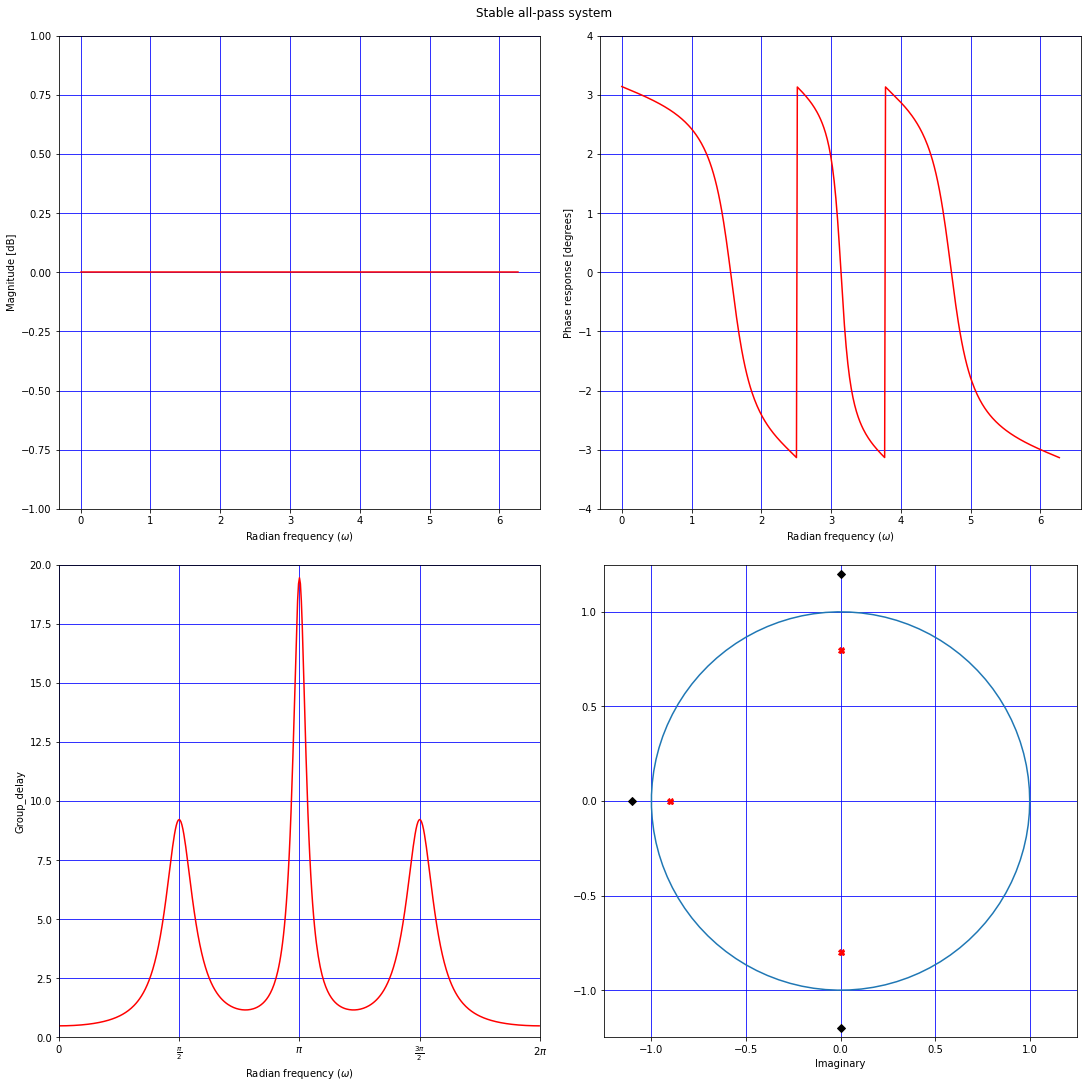

In [18]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#poles
theta = np.pi
p1 = 0.8*np.exp(1j*theta/2)
#p2 is the missing pole, technically (p3)
p2 = 0.8*np.exp(-1j*theta/2)
p3 = 0.9*np.exp(1j*theta)

#defining zeroes
z1 = 1/np.conj(p1)
z2 = np.conj(z1)
z3 = 1/np.conj(p3)
Z = np.array([z1, z2, z3])
P = np.array([p1,p2,p3])
k = p1*p2*p3

b, a = signal.zpk2tf(Z,P,k)
w, H = signal.freqz(b,a,whole=True)
angleH = np.angle(H)
w, grdH = signal.group_delay((b,a), whole=True)

#plotting magnitude response
fig1, ax4 = plt.subplots(2,2, figsize=(15,15),constrained_layout=True)
fig1.suptitle('Stable all-pass system')
ax4[0, 0].plot(w,20*np.log10(abs(H)),'r')
ax4[0, 0].set_ylabel('Magnitude [dB]')
ax4[0, 0].set_xlabel('Radian frequency '+ r'$(\omega)$')
ax4[0, 0].set_ylim([-1, 1])
ax4[0, 0].grid(color='b')

#plotting phase response
ax4[0, 1].plot(w,angleH,'r')
ax4[0, 1].set_ylim([-4,4])
ax4[0, 1].grid(color='b')
ax4[0, 1].set_ylabel('Phase response [degrees]')
ax4[0, 1].set_xlabel('Radian frequency '+ r'$(\omega)$')

#plotting group delay
ax4[1, 0].plot(w,grdH,'r')
ax4[1, 0].set_ylabel('Group_delay')
ax4[1, 0].set_xlabel('Radian frequency '+ r'$(\omega)$')
ax4[1, 0].grid(color='b')
ax4[1, 0].set_ylim([0,20])
ax4[1, 0].set_xlim([0, 2*np.pi])
ax4[1, 0].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax4[1, 0].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);

#making unit circle
angle = np.linspace(0 , 2 * np.pi , 100) 
 
radius = 1.0
 
x = radius * np.cos(angle) 
y = radius * np.sin(angle) 
 
#figure, axes = plt.subplots(1) 
 
ax4[1, 1].plot(x, y)
# X represent poles
ax4[1, 1].plot(0.8, 'X', color='red')
ax4[1, 1].plot(-0.8, 'X', color='red')
ax4[1, 1].plot(-0.9, 0, 'X', color='red')
# dot represent zero
ax4[1, 1].plot(1.2, 'D', color='black')
ax4[1, 1].plot(-1.2, 'D', color='black')
ax4[1, 1].plot(-1.1,0, 'D', color='black')
ax4[1, 1].grid(axis='both', which='both', color='b', linestyle='-')
ax4[1, 1].set_xlabel('Real')
ax4[1, 1].set_xlabel('Imaginary')
ax4[1, 1].set_xlim(-1.25, 1.25)
ax4[1, 1].set_ylim(-1.25, 1.25)
ax4[1, 1].set_aspect(1) 

#plt.title( 'Plot-Zero Values' ) 
#plt.show()